In [39]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
import plotly.offline as py
plotly.offline.init_notebook_mode()

In [25]:
dataset = pd.read_csv('magalu08.csv')
dataset = dataset.dropna(subset = ['Date', 'Open', 'High', 'Low', 'Close'])

In [26]:
dataset.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-09,12.3337,12.3750,11.7712,11.7712,11.210161,932800.0
1,2017-01-10,11.8250,12.2500,11.8138,12.0513,11.476912,624000.0
2,2017-01-11,11.9963,12.2875,11.9963,12.1875,11.606620,898400.0
3,2017-01-12,12.3500,13.0612,12.3212,13.0000,12.380395,1288000.0
4,2017-01-13,12.9987,13.3600,12.9000,13.2500,12.618479,724000.0
5,2017-01-16,13.2037,13.2037,12.9087,12.9888,12.369729,595200.0
6,2017-01-17,13.0000,13.2825,12.9062,13.2500,12.618479,595200.0
7,2017-01-18,13.2500,13.3737,13.2312,13.3188,12.684001,325600.0
8,2017-01-19,13.3188,13.4500,13.2075,13.4250,12.785138,480000.0
9,2017-01-20,13.2950,15.0000,13.2950,14.9875,14.273167,2337600.0


In [27]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [28]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,495.000000,495.000000,495.000000,495.000000,495.000000,4.950000e+02
mean,82.159277,83.821756,80.333269,82.163909,81.660893,1.503212e+06
std,46.420574,47.125091,45.570398,46.361229,46.445320,1.070363e+06
min,11.825000,12.250000,11.771200,11.771200,11.210161,0.000000e+00
25%,35.403099,36.556249,35.039400,36.456850,36.122429,8.588000e+05
50%,78.699997,80.000000,77.000000,78.599998,78.126709,1.243200e+06
75%,119.774998,122.545002,117.084999,119.610001,119.218475,1.838650e+06
max,184.990005,185.990005,179.360001,185.990005,185.990005,1.129010e+07


In [29]:
dataset['Variation'] = dataset['Close'].sub(dataset['Open'])

In [30]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Variation
0,2017-01-09,12.3337,12.3750,11.7712,11.7712,11.210161,932800.0,-0.5625
1,2017-01-10,11.8250,12.2500,11.8138,12.0513,11.476912,624000.0,0.2263
2,2017-01-11,11.9963,12.2875,11.9963,12.1875,11.606620,898400.0,0.1912
3,2017-01-12,12.3500,13.0612,12.3212,13.0000,12.380395,1288000.0,0.6500
4,2017-01-13,12.9987,13.3600,12.9000,13.2500,12.618479,724000.0,0.2513


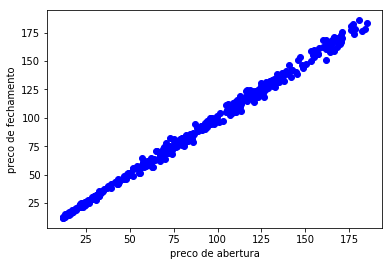

In [31]:
x = dataset['Open']
y = dataset['Close']
plt.scatter(x,y,color='b')
plt.xlabel('preco de abertura')
plt.ylabel('preco de fechamento')
plt.axis([min(x),max(x),min(y),max(y)])
plt.autoscale('False')
plt.show()

In [32]:
features = ['Open','High','Low','Volume']
treino = dataset[features]

In [33]:
treino.head()

,Open,High,Low,Volume
0,12.3337,12.3750,11.7712,932800.0
1,11.8250,12.2500,11.8138,624000.0
2,11.9963,12.2875,11.9963,898400.0
3,12.3500,13.0612,12.3212,1288000.0
4,12.9987,13.3600,12.9000,724000.0


In [34]:
y = dataset['Close']

In [35]:
X_treino, X_teste, y_treino, y_teste = train_test_split(treino, y, random_state=42)

In [36]:
lr_model = LinearRegression()

In [37]:
lr_model.fit(X_treino,y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
RMSE = mean_squared_error(y_teste, lr_model.predict(X_teste))**0.5
RMSE

1.2018194557555097

In [42]:
lr_model.predict(X_teste)[0]

170.9348254069235

In [46]:
X_teste.head()

,Open,High,Low,Volume
459,170.300003,173.250000,168.250000,1360600.0
73,26.497499,27.747499,26.497499,1780000.0
310,98.500000,99.900002,96.940002,1273400.0
175,80.500000,83.260002,78.519997,1806800.0
333,98.000000,99.989998,95.699997,1932900.0
